In [ ]:


from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/diabetes (2).csv'
diabetes_data = pd.read_csv(file_path)

# Extract BMI values for individuals who do not have diabetes
bmi_no_diabetes = diabetes_data[diabetes_data['Outcome'] == 0]['BMI']

# Set sample size
sample_size = 100

# Randomly choose a sample from the population (BMI of non-diabetic individuals)
np.random.seed(0)  # for reproducibility
sample_bmi = np.random.choice(bmi_no_diabetes, size=sample_size, replace=False)

# Display the sample
print(sample_bmi)


[32.5 42.4 30.2 24.2 28.4 27.6 30.1 46.3 28.7 30.1 31.6 42.1 27.8 24.
 40.5 25.6 23.1 27.4 31.2 42.7 47.9 26.9 22.3 29.6 37.7 30.9 27.4 32.4
 27.3 37.2 33.8 27.7 24.3 39.4 29.5 32.  33.5 28.3 32.8 25.1 33.3 25.
 20.1 35.3 34.2 28.1 28.7 25.  28.8 29.  46.2 34.2 45.3 35.  27.7 36.
 24.2 24.9 34.9 29.8 26.8 36.5 28.5 39.4 25.9 27.5 22.2 35.5 18.2 23.2
 45.2 26.6 30.8 36.6 35.9 27.8 22.2 24.6 26.  33.2 23.8 30.8 36.1 27.2
 37.6 22.1 29.3 35.8 21.7 26.5 42.7 28.7 27.  30.8 20.8 32.5 32.  25.4
 31.6 25.9]


In [ ]:
from sklearn.utils import resample

# Set the number of bootstrap repetitions
num_repetitions = 1000
bootstrap_means = np.zeros(num_repetitions)

# Perform bootstrapping
for i in range(num_repetitions):
    # Generate a bootstrap sample: sample with replacement
    bootstrap_sample = resample(sample_bmi, n_samples=len(sample_bmi), replace=True)
    # Compute and store the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Compute the 90% confidence interval for the mean using the percentile method
lower_bound = np.percentile(bootstrap_means, 5)
upper_bound = np.percentile(bootstrap_means, 95)

(lower_bound, upper_bound)


(29.656449999999996, 31.78105)

In [ ]:
# Calculate the bootstrap mean
bootstrap_mean = np.mean(bootstrap_means)

# Calculate the population mean (mean BMI of non-diabetic individuals)
population_mean = bmi_no_diabetes.mean()

(bootstrap_mean, population_mean)


(30.722985, 30.3042)

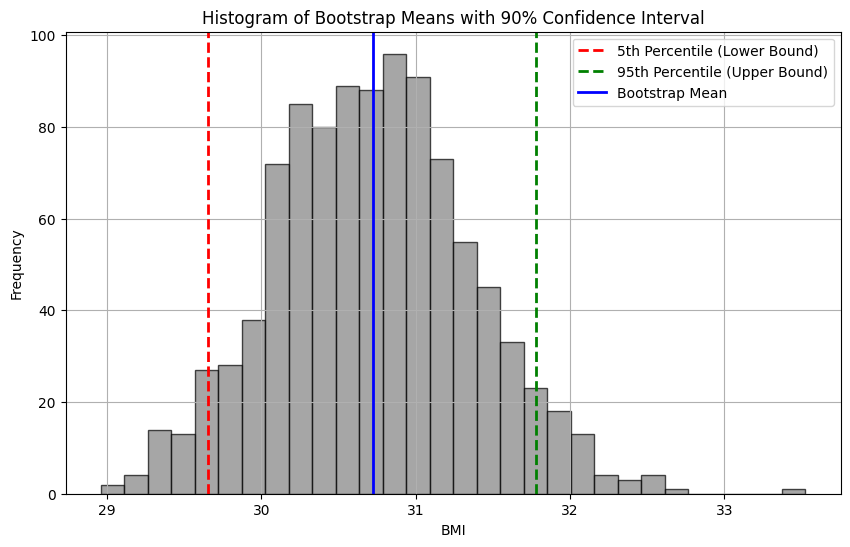

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='gray', alpha=0.7, edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='5th Percentile (Lower Bound)')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='95th Percentile (Upper Bound)')
plt.axvline(bootstrap_mean, color='blue', linestyle='solid', linewidth=2, label='Bootstrap Mean')
plt.title('Histogram of Bootstrap Means with 90% Confidence Interval')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Set a smaller sample size
small_sample_size = 10

# Randomly choose a smaller sample from the population (BMI of non-diabetic individuals)
np.random.seed(1)  # for reproducibility
small_sample_bmi = np.random.choice(bmi_no_diabetes, size=small_sample_size, replace=False)

# Perform bootstrapping for the smaller sample
small_bootstrap_means = np.zeros(num_repetitions)
for i in range(num_repetitions):
    # Generate a bootstrap sample: sample with replacement
    small_bootstrap_sample = resample(small_sample_bmi, n_samples=len(small_sample_bmi), replace=True)
    # Compute and store the mean of the bootstrap sample
    small_bootstrap_means[i] = np.mean(small_bootstrap_sample)

# Compute the 90% confidence interval for the mean using the percentile method for the smaller sample
small_lower_bound = np.percentile(small_bootstrap_means, 5)
small_upper_bound = np.percentile(small_bootstrap_means, 95)

# Calculate the bootstrap mean for the smaller sample
small_bootstrap_mean = np.mean(small_bootstrap_means)

(small_lower_bound, small_upper_bound), small_bootstrap_mean


((28.8, 33.711), 31.12918)

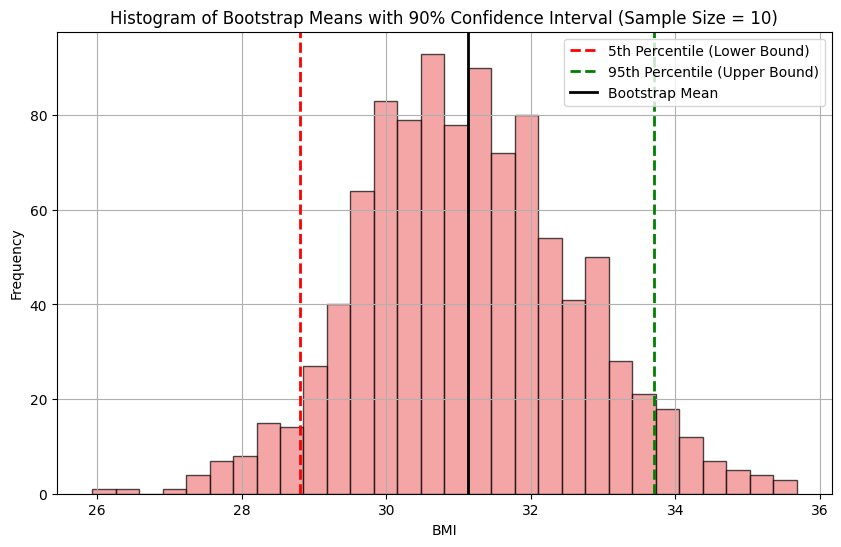

In [ ]:
# Plotting the histogram of the bootstrap distribution for the smaller sample
plt.figure(figsize=(10, 6))
plt.hist(small_bootstrap_means, bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(small_lower_bound, color='red', linestyle='dashed', linewidth=2, label='5th Percentile (Lower Bound)')
plt.axvline(small_upper_bound, color='green', linestyle='dashed', linewidth=2, label='95th Percentile (Upper Bound)')
plt.axvline(small_bootstrap_mean, color='black', linestyle='solid', linewidth=2, label='Bootstrap Mean')
plt.title('Histogram of Bootstrap Means with 90% Confidence Interval (Sample Size = 10)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
